In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
from predictor import train_model

In [3]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID', axis=1, inplace=True)

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [6]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [7]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[938  97]
 [180 194]]
ROC-AUC Score: 0.8470846573148363

Feature Importances:
 InternetService_Fiber optic              0.199385
Contract_Two year                        0.183280
Contract_One year                        0.127635
PaymentMethod_Electronic check           0.099488
InternetService_No                       0.080187
tenure                                   0.053615
StreamingMovies_Yes                      0.030968
OnlineSecurity_Yes                       0

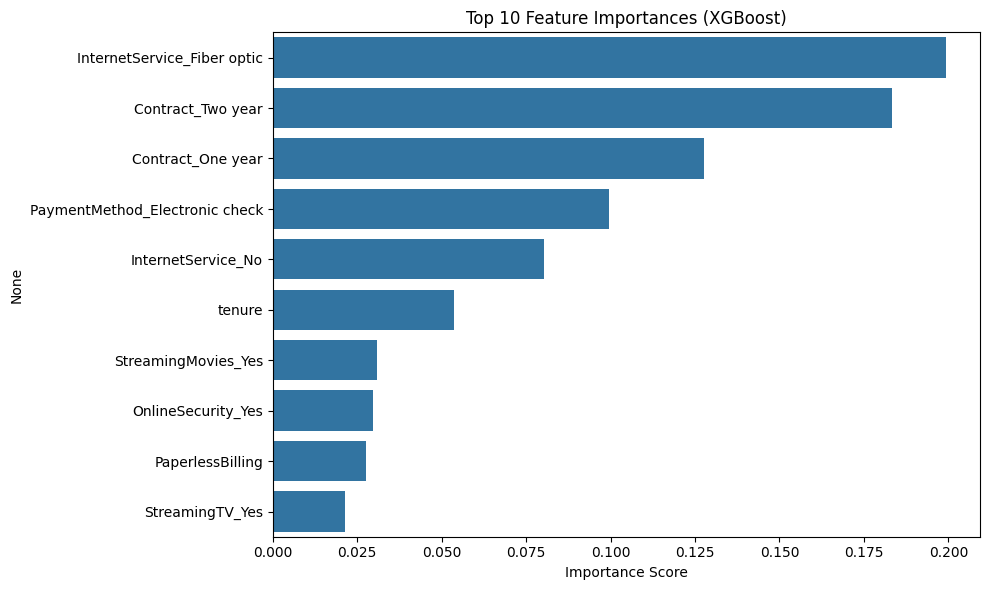

In [10]:
model = train_model(df)

In [ ]:
import joblib

joblib.dump(model, "xgb_model.pkl")

feature_columns = df.drop("Churn", axis=1).columns.tolist()
joblib.dump(feature_columns, "model_columns.pkl")


['model_columns.pkl']

In [16]:

model = joblib.load("xgb_model.pkl")
model_columns = joblib.load("model_columns.pkl")


In [12]:
# Example raw entries (dict format)
sample_data = pd.DataFrame([
    {
        "gender": "Male",
        "SeniorCitizen": 0,
        "Partner": "Yes",
        "Dependents": "No",
        "tenure": 12,
        "PhoneService": "Yes",
        "MultipleLines": "No",
        "InternetService": "DSL",
        "OnlineSecurity": "Yes",
        "OnlineBackup": "Yes",
        "DeviceProtection": "No",
        "TechSupport": "No",
        "StreamingTV": "No",
        "StreamingMovies": "No",
        "Contract": "Month-to-month",
        "PaperlessBilling": "Yes",
        "PaymentMethod": "Electronic check",
        "MonthlyCharges": 70.35,
        "TotalCharges": 845.5
    },
    {
        "gender": "Female",
        "SeniorCitizen": 1,
        "Partner": "No",
        "Dependents": "No",
        "tenure": 1,
        "PhoneService": "Yes",
        "MultipleLines": "No",
        "InternetService": "Fiber optic",
        "OnlineSecurity": "No",
        "OnlineBackup": "No",
        "DeviceProtection": "No",
        "TechSupport": "No",
        "StreamingTV": "Yes",
        "StreamingMovies": "Yes",
        "Contract": "Month-to-month",
        "PaperlessBilling": "Yes",
        "PaymentMethod": "Mailed check",
        "MonthlyCharges": 85.9,
        "TotalCharges": 85.9
    }
])


In [17]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    sample_data[col] = le.fit_transform(sample_data[col])

sample_data = pd.get_dummies(sample_data, drop_first=True)


for col in model_columns:
    if col not in sample_data.columns:
        sample_data[col] = 0  


sample_data = sample_data[model_columns]


In [18]:
predictions = model.predict(sample_data)
probabilities = model.predict_proba(sample_data)[:, 1]


for i, prob in enumerate(probabilities):
    print(f"Customer {i+1}: Churn Probability = {prob:.2f}, Prediction = {'Yes' if predictions[i] == 1 else 'No'}")


Customer 1: Churn Probability = 0.17, Prediction = No
Customer 2: Churn Probability = 0.86, Prediction = Yes
